In [1]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

from sklearn.preprocessing import MinMaxScaler

import IPython

from data_pipeline import DataPipeline
import model_hyperparams

import xgboost as xgb

from memory_profiler import memory_usage

In [4]:
# Load and preprocess the data
data_upac08 = DataPipeline('data/upac08')

# Track memory usage of the preprocessing
preprocessing_memory_usage = memory_usage((data_upac08._do, ()), timestamps=True)

date range: 2019-01-01 00:00:00 - 2021-04-01 23:45:00


In [10]:
# Save the memory usage to a dataframe

mem_usage = pd.DataFrame(preprocessing_memory_usage, columns=['Memory Usage', 'Timestamp'])
mem_usage.index = pd.to_datetime(mem_usage['Timestamp'], unit='s')
mem_usage = mem_usage.drop('Timestamp', axis=1)

mem_usage

,Memory Usage
Timestamp,
2023-09-12 03:31:41.799300608,209.453125
2023-09-12 03:31:42.564902656,209.453125
2023-09-12 03:31:42.678918912,217.703125
2023-09-12 03:31:42.788772608,247.214844
2023-09-12 03:31:42.896312576,252.300781
2023-09-12 03:31:43.005580800,250.546875
2023-09-12 03:31:43.114108928,255.128906
2023-09-12 03:31:43.223678720,252.921875
2023-09-12 03:31:43.331668992,259.550781


In [11]:
# Create the study for the UPAC parameter optimization

xgb_study = model_hyperparams.parameter_sweep_xgb(train_x=data_upac08.train_data[0],
                                                  train_y=data_upac08.train_data[1],
                                                  val_x=data_upac08.val_data[0],
                                                  val_y=data_upac08.val_data[1],
                                                  n_trials=100)

[I 2023-09-12 04:34:39,352] A new study created in memory with name: no-name-e972e7d4-a124-4fd8-9930-c84758b877c5


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2023-09-12 04:34:46,799] Trial 0 finished with value: 0.009477256263810522 and parameters: {'n_estimators': 4785, 'max_depth': 3285, 'reg_alpha': 0.00018816996119468417, 'reg_lambda': 0.0008805715142108432}. Best is trial 0 with value: 0.009477256263810522.
[I 2023-09-12 04:34:54,009] Trial 1 finished with value: 0.008706706804132932 and parameters: {'n_estimators': 4671, 'max_depth': 286, 'reg_alpha': 0.0009756564133401358, 'reg_lambda': 4.5810115334178186e-05}. Best is trial 1 with value: 0.008706706804132932.
[I 2023-09-12 04:35:01,799] Trial 2 finished with value: 0.00949985384059664 and parameters: {'n_estimators': 4913, 'max_depth': 4094, 'reg_alpha': 0.00026054673068951216, 'reg_lambda': 0.0002565046978320881}. Best is trial 1 with value: 0.008706706804132932.
[I 2023-09-12 04:35:07,241] Trial 3 finished with value: 0.009345544458874982 and parameters: {'n_estimators': 2669, 'max_depth': 3106, 'reg_alpha': 0.00046634000786086494, 'reg_lambda': 0.0003691595943356122}. Best is 

In [12]:
# Train the UPAC model and track memory usage

xgb_model = xgb.XGBRegressor(n_estimators=xgb_study.best_params['n_estimators'],
                             max_depth=xgb_study.best_params['max_depth'],
                             reg_alpha=xgb_study.best_params['reg_alpha'],
                             reg_lambda=xgb_study.best_params['reg_lambda'])

model_mem_usage = memory_usage((xgb_model.fit, (data_upac08.train_data[0], data_upac08.train_data[1])), timestamps=True)

In [13]:
# Save the memory usage to a dataframe

model_mem_usage = pd.DataFrame(model_mem_usage, columns=['Memory Usage', 'Timestamp'])
model_mem_usage.index = pd.to_datetime(model_mem_usage['Timestamp'], unit='s')
model_mem_usage = model_mem_usage.drop('Timestamp', axis=1)

model_mem_usage

,Memory Usage
Timestamp,
2023-09-12 03:46:19.564298496,268.496094
2023-09-12 03:46:20.389854208,268.496094
2023-09-12 03:46:20.499237632,307.890625
2023-09-12 03:46:20.609534720,311.355469
2023-09-12 03:46:20.718945280,333.445312
2023-09-12 03:46:20.830466304,311.046875
2023-09-12 03:46:20.941032448,327.332031
2023-09-12 03:46:21.050358784,314.343750
2023-09-12 03:46:21.159698944,314.898438


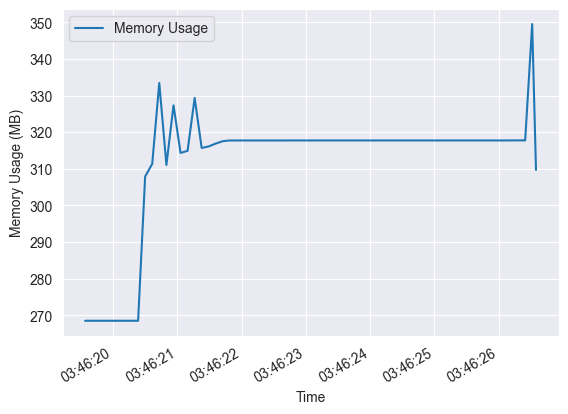

In [18]:
model_mem_usage.plot()

plt.ylabel('Memory Usage (MB)')
plt.xlabel('Time')

plt.show()

In [16]:
# Define a training loop for UPACs

from joblib import dump, load
import optuna

def train_upac(upac_name, trainx, trainy, valx, valy, testx, testy, ntrials=100, nruns=10):
    # First do a parameter sweep with Optuna
    def create_model(trial):
        # Do search for n_estimators, max_depth, reg_alpha and reg_lambda
        sug_estimators = trial.suggest_int('n_estimators', 50, 5000)
        sug_depth = trial.suggest_int('max_depth', 10, 5000)
        sug_alpha = trial.suggest_float('reg_alpha', 1e-5, 1e-3)
        sug_lambda = trial.suggest_float('reg_lambda', 1e-5, 1e-3)

        sug_model = xgb.XGBRegressor(n_estimators=sug_estimators,
                                     max_depth=sug_depth,
                                     reg_alpha=sug_alpha,
                                     reg_lambda=sug_lambda)

        return sug_model


    def create_training(model):
        model.fit(trainx[upac_name], trainy[upac_name])
    
    
    def create_evaluation(model):
        temp_yhat = model.predict(valx[upac_name])
        return sklearn.metrics.mean_squared_error(valy[upac_name], temp_yhat)
    
    
    def create_objective(trial):
        # Instantiate the model
        temp_model = create_model(trial)

        # Train the model
        create_training(temp_model)

        # Evaluate model
        metrics_val = create_evaluation(temp_model)

        return metrics_val

    study = optuna.create_study(direction='minimize')
    study.optimize(create_objective, n_trials=ntrials, show_progress_bar=True)
    
    IPython.display.clear_output()

    @profile
    def train_xgb(current_study):
        inner_model = xgb.XGBRegressor(n_estimators=current_study.best_params['n_estimators'],
                                       max_depth=current_study.best_params['max_depth'],
                                       reg_alpha=current_study.best_params['reg_alpha'],
                                       reg_lambda=current_study.best_params['reg_lambda'])
        return inner_model
    
    # Then train different models using the best parameters found
    model_dictionary = {}

    for i in np.arange(nruns):
        temp_model = train_xgb(study)
        
        # Train the model
        temp_model.fit(trainx[upac_name],#['Ghi'].values.reshape(trainx[upac_name].values.shape[0], 1),
                       trainy[upac_name])
        
        # Save -> dump(example_model, 'example_model.joblib')
        dump(temp_model, 'models/xgboost/{}_all/Model {:02d}.joblib'.format(upac_name, i+1))
        
        # Add it to the dictionary to return
        model_dictionary['Model {:02d}'.format(i+1)] = temp_model
        
    return study, model_dictionary

In [19]:
# Aux Function for predicting and storing values

def do_predictions(dictionary, save_path, X, y, index, scaler=None):

    # Create a scaler for only the first variable
    temp_scaler = sklearn.preprocessing.MinMaxScaler()
    temp_scaler.min

    # Go through each model in the dictionary
    for model in dictionary.keys():
        print('Doing {}'.format(model))
        
        temp_path = '{}/{}.csv'.format(save_path, model)
        
        y_pred = dictionary[model].predict(X)
        y_pred = pd.DataFrame(y_pred, columns=['PV'],
                              index=index)

        if scaler is not None:
            # Use only the scaler's first column for the inverse transform
            y_pred = scaler.inverse_transform(y_pred)

        y_pred.to_csv(temp_path)
        
    # Also save ground-truth data at the end of the loop
    y_true = pd.DataFrame(y, columns=['PV'],
                          index=index)
    
    temp_path_gt = '{}/gt.csv'.format(save_path)
    y_true.to_csv(temp_path_gt)
    
    
def predict_upacs(model_dictionary, scaler_dictionary, upac_name, X_train, y_train, X_val, y_val, X_test, y_test):
    # Simply call the function above for each of the settings to simplify
    
    print('Doing training for {}'.format(upac_name))
    temp_path = 'results/xgboost/{}_all/train'.format(upac_name)
    do_predictions(dictionary=model_dictionary, 
                   save_path=temp_path, 
                   X=X_train[upac_name],#[['CloudOpacity', 'GtiFixedTilt', 'Day Y', 'Year X']], 
                   y=y_train[upac_name],
                   index=normalized_train[upac_name].index,
                   scaler=scaler_dictionary[upac_name])
    IPython.display.clear_output()
    
    print('Doing validation for {}'.format(upac_name))
    temp_path = 'results/xgboost/{}_all/val'.format(upac_name)
    do_predictions(dictionary=model_dictionary, 
                   save_path=temp_path, 
                   X=X_val[upac_name],#[['CloudOpacity', 'GtiFixedTilt', 'Day Y', 'Year X']], 
                   y=y_val[upac_name],
                   index=normalized_val[upac_name].index,
                   scaler=scaler_dictionary[upac_name])
    IPython.display.clear_output()
    
    print('Doing testing for {}'.format(upac_name))
    temp_path = 'results/xgboost/{}_all/test'.format(upac_name)
    do_predictions(dictionary=model_dictionary, 
                   save_path=temp_path, 
                   X=X_test[upac_name],#[['CloudOpacity', 'GtiFixedTilt', 'Day Y', 'Year X']], 
                   y=y_test[upac_name],
                   index=normalized_test[upac_name].index,
                   scaler=scaler_dictionary[upac_name])
    IPython.display.clear_output()

In [20]:
# Train UPAC08 - all features

upac08_study, upac08_models = train_upac(upac_name='upac08', 
                                         trainx=X_train, 
                                         trainy=y_train,
                                         valx=X_val, valy=y_val,
                                         testx=X_test, testy=y_test)

[I 2023-09-12 02:02:18,704] A new study created in memory with name: no-name-85fc71df-2d70-4a72-b549-1f998be38e9c


  0%|          | 0/100 [00:00<?, ?it/s]

[W 2023-09-12 02:02:21,500] Trial 0 failed with parameters: {'n_estimators': 3974, 'max_depth': 3725, 'reg_alpha': 0.0009189958152627335, 'reg_lambda': 0.0004990061089832175} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "C:\Users\camar\DataspellProjects\pv_forecast\venv\lib\site-packages\optuna\study\_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "C:\Users\camar\AppData\Local\Temp\ipykernel_26048\3934146206.py", line 37, in create_objective
    create_training(temp_model)
  File "C:\Users\camar\AppData\Local\Temp\ipykernel_26048\3934146206.py", line 24, in create_training
    model.fit(trainx[upac_name], trainy[upac_name])
  File "C:\Users\camar\DataspellProjects\pv_forecast\venv\lib\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
  File "C:\Users\camar\DataspellProjects\pv_forecast\venv\lib\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
  F

KeyboardInterrupt: 

In [18]:
# UPAC08 best params

upac08_study.best_params

{'n_estimators': 2460,
 'max_depth': 10,
 'reg_alpha': 0.0008393587688220376,
 'reg_lambda': 0.000408292306694367}

In [21]:
# Predict UPAC08 - All features
predict_upacs(model_dictionary=upac08_models, 
              upac_name='upac08',
              X_train=X_train, y_train=y_train,
              X_val=X_val, y_val=y_val,
              X_test=X_test, y_test=y_test,
              scaler_dictionary=scaler_dict)

Doing training for upac08
Doing Model 01


ValueError: non-broadcastable output operand with shape (34848,1) doesn't match the broadcast shape (34848,23)

In [65]:
# Define a training loop for UPACs

from joblib import dump, load
import optuna

def train_upac_top1(upac_name, trainx, trainy, valx, valy, testx, testy, ntrials=100, nruns=10):
    # First do a parameter sweep with Optuna
    def create_model(trial):
        # Do search for n_estimators, max_depth, reg_alpha and reg_lambda
        sug_estimators = trial.suggest_int('n_estimators', 50, 5000)
        sug_depth = trial.suggest_int('max_depth', 10, 5000)
        sug_alpha = trial.suggest_float('reg_alpha', 1e-5, 1e-3)
        sug_lambda = trial.suggest_float('reg_lambda', 1e-5, 1e-3)

        sug_model = xgb.XGBRegressor(n_estimators=sug_estimators,
                                     max_depth=sug_depth,
                                     reg_alpha=sug_alpha,
                                     reg_lambda=sug_lambda)

        return sug_model


    def create_training(model):
        model.fit(trainx[upac_name], trainy[upac_name])
    
    
    def create_evaluation(model):
        temp_yhat = model.predict(valx[upac_name])
        return sklearn.metrics.mean_squared_error(valy[upac_name], temp_yhat)
    
    
    def create_objective(trial):
        # Instantiate the model
        temp_model = create_model(trial)

        # Train the model
        create_training(temp_model)

        # Evaluate model
        metrics_val = create_evaluation(temp_model)

        return metrics_val

    study = optuna.create_study(direction='minimize')
    study.optimize(create_objective, n_trials=ntrials, show_progress_bar=True)
    
    IPython.display.clear_output()
    
    
    # Then train different models using the best parameters found
    model_dictionary = {}
    for i in np.arange(nruns):
        temp_model = xgb.XGBRegressor(n_estimators=study.best_params['n_estimators'],
                                      max_depth=study.best_params['max_depth'],
                                      reg_alpha=study.best_params['reg_alpha'],
                                      reg_lambda=study.best_params['reg_lambda'])
        
        # Train the model
        temp_model.fit(trainx[upac_name]['GtiFixedTilt'].values.reshape(trainx[upac_name].values.shape[0], 1),
                       trainy[upac_name])
        
        # Save -> dump(example_model, 'example_model.joblib')
        dump(temp_model, 'models/xgboost/{}_top1/Model {:02d}.joblib'.format(upac_name, i+1))
        
        # Add it to the dictionary to return
        model_dictionary['Model {:02d}'.format(i+1)] = temp_model
        
    return study, model_dictionary

In [87]:
# Aux Function for predicting and storing values

def do_predictions(dictionary, save_path, X, y, index):
    # Go through each model in the dictionary
    for model in dictionary.keys():
        print('Doing {}'.format(model))
        
        temp_path = '{}/{}.csv'.format(save_path, model)
        
        y_pred = dictionary[model].predict(X)
        y_pred = pd.DataFrame(y_pred, columns=['PV'],
                              index=index)
        
        y_pred.to_csv(temp_path)
        
    # Also save ground-truth data at the end of the loop
    y_true = pd.DataFrame(y, columns=['PV'],
                          index=index)
    
    temp_path_gt = '{}/gt.csv'.format(save_path)
    y_true.to_csv(temp_path_gt)
    
    
def predict_upacs_top1(model_dictionary, upac_name, X_train, y_train, X_val, y_val, X_test, y_test):
    # Simply call the function above for each of the settings to simplify
    
    print('Doing training for {}'.format(upac_name))
    temp_path = 'results/xgboost/{}_top1/train'.format(upac_name)
    do_predictions(dictionary=model_dictionary, 
                   save_path=temp_path, 
                   X=X_train[upac_name]['GtiFixedTilt'].values.reshape(-1, 1), 
                   y=y_train[upac_name],
                   index=normalized_train[upac_name].index)
    IPython.display.clear_output()
    
    print('Doing validation for {}'.format(upac_name))
    temp_path = 'results/xgboost/{}_top1/val'.format(upac_name)
    do_predictions(dictionary=model_dictionary, 
                   save_path=temp_path, 
                   X=X_val[upac_name]['GtiFixedTilt'].values.reshape(-1, 1),
                   y=y_val[upac_name],
                   index=normalized_val[upac_name].index)
    IPython.display.clear_output()
    
    print('Doing testing for {}'.format(upac_name))
    temp_path = 'results/xgboost/{}_top1/test'.format(upac_name)
    do_predictions(dictionary=model_dictionary, 
                   save_path=temp_path, 
                   X=X_test[upac_name]['GtiFixedTilt'].values.reshape(-1, 1), 
                   y=y_test[upac_name],
                   index=normalized_test[upac_name].index)
    IPython.display.clear_output()

In [89]:
# Train UPAC08 - top 1

upac08_study_top1, upac08_models_top1 = train_upac_top1(upac_name='upac08', 
                                                        trainx=X_train, 
                                                        trainy=y_train,
                                                        valx=X_val, valy=y_val,
                                                        testx=X_test, testy=y_test)

In [88]:
# Predict UPAC08 - All features
predict_upacs_top1(model_dictionary=upac08_models_top1, 
                   upac_name='upac08',
                   X_train=X_train, y_train=y_train,
                   X_val=X_val, y_val=y_val,
                   X_test=X_test, y_test=y_test)

Doing training for upac08
Doing Model 01


ValueError: Feature shape mismatch, expected: 8, got 34848

#######################################

In [90]:
# Define a training loop for UPACs

from joblib import dump, load
import optuna

def train_upac_gti(upac_name, trainx, trainy, valx, valy, testx, testy, ntrials=100, nruns=10):
    # First do a parameter sweep with Optuna
    def create_model(trial):
        # Do search for n_estimators, max_depth, reg_alpha and reg_lambda
        sug_estimators = trial.suggest_int('n_estimators', 50, 5000)
        sug_depth = trial.suggest_int('max_depth', 10, 5000)
        sug_alpha = trial.suggest_float('reg_alpha', 1e-5, 1e-3)
        sug_lambda = trial.suggest_float('reg_lambda', 1e-5, 1e-3)

        sug_model = xgb.XGBRegressor(n_estimators=sug_estimators,
                                     max_depth=sug_depth,
                                     reg_alpha=sug_alpha,
                                     reg_lambda=sug_lambda)

        return sug_model


    def create_training(model):
        model.fit(trainx[upac_name], trainy[upac_name])
    
    
    def create_evaluation(model):
        temp_yhat = model.predict(valx[upac_name])
        return sklearn.metrics.mean_squared_error(valy[upac_name], temp_yhat)
    
    
    def create_objective(trial):
        # Instantiate the model
        temp_model = create_model(trial)

        # Train the model
        create_training(temp_model)

        # Evaluate model
        metrics_val = create_evaluation(temp_model)

        return metrics_val

    study = optuna.create_study(direction='minimize')
    study.optimize(create_objective, n_trials=ntrials, show_progress_bar=True)
    
    IPython.display.clear_output()
    
    
    # Then train different models using the best parameters found
    model_dictionary = {}
    for i in np.arange(nruns):
        temp_model = xgb.XGBRegressor(n_estimators=study.best_params['n_estimators'],
                                      max_depth=study.best_params['max_depth'],
                                      reg_alpha=study.best_params['reg_alpha'],
                                      reg_lambda=study.best_params['reg_lambda'])
        
        # Train the model
        temp_model.fit(trainx[upac_name].drop('Ghi', axis=1),
                       trainy[upac_name])
        
        # Save -> dump(example_model, 'example_model.joblib')
        dump(temp_model, 'models/xgboost/{}_gti/Model {:02d}.joblib'.format(upac_name, i+1))
        
        # Add it to the dictionary to return
        model_dictionary['Model {:02d}'.format(i+1)] = temp_model
        
    return study, model_dictionary

In [91]:
# Aux Function for predicting and storing values

def do_predictions(dictionary, save_path, X, y, index):
    # Go through each model in the dictionary
    for model in dictionary.keys():
        print('Doing {}'.format(model))
        
        temp_path = '{}/{}.csv'.format(save_path, model)
        
        y_pred = dictionary[model].predict(X)
        y_pred = pd.DataFrame(y_pred, columns=['PV'],
                              index=index)
        
        y_pred.to_csv(temp_path)
        
    # Also save ground-truth data at the end of the loop
    y_true = pd.DataFrame(y, columns=['PV'],
                          index=index)
    
    temp_path_gt = '{}/gt.csv'.format(save_path)
    y_true.to_csv(temp_path_gt)
    
    
def predict_upacs_gti(model_dictionary, upac_name, X_train, y_train, X_val, y_val, X_test, y_test):
    # Simply call the function above for each of the settings to simplify
    
    print('Doing training for {}'.format(upac_name))
    temp_path = 'results/xgboost/{}_gti/train'.format(upac_name)
    do_predictions(dictionary=model_dictionary, 
                   save_path=temp_path, 
                   X=X_train[upac_name].drop('Ghi', axis=1), 
                   y=y_train[upac_name],
                   index=normalized_train[upac_name].index)
    IPython.display.clear_output()
    
    print('Doing validation for {}'.format(upac_name))
    temp_path = 'results/xgboost/{}_gti/val'.format(upac_name)
    do_predictions(dictionary=model_dictionary, 
                   save_path=temp_path, 
                   X=X_val[upac_name].drop('Ghi', axis=1),
                   y=y_val[upac_name],
                   index=normalized_val[upac_name].index)
    IPython.display.clear_output()
    
    print('Doing testing for {}'.format(upac_name))
    temp_path = 'results/xgboost/{}_gti/test'.format(upac_name)
    do_predictions(dictionary=model_dictionary, 
                   save_path=temp_path, 
                   X=X_test[upac_name].drop('Ghi', axis=1), 
                   y=y_test[upac_name],
                   index=normalized_test[upac_name].index)
    IPython.display.clear_output()

In [92]:
# Train UPAC08 - Gti, no Ghi

upac08_study_gti, upac08_models_gti = train_upac_gti(upac_name='upac08', 
                                                        trainx=X_train, 
                                                        trainy=y_train,
                                                        valx=X_val, valy=y_val,
                                                        testx=X_test, testy=y_test)

In [93]:
# Predict UPAC08 - Gti
predict_upacs_gti(model_dictionary=upac08_models_gti, 
                  upac_name='upac08',
                  X_train=X_train, y_train=y_train,
                  X_val=X_val, y_val=y_val,
                  X_test=X_test, y_test=y_test)

####################################################

In [96]:
# Define a training loop for UPACs

from joblib import dump, load
import optuna

def train_upac_ghi(upac_name, trainx, trainy, valx, valy, testx, testy, ntrials=100, nruns=10):
    # First do a parameter sweep with Optuna
    def create_model(trial):
        # Do search for n_estimators, max_depth, reg_alpha and reg_lambda
        sug_estimators = trial.suggest_int('n_estimators', 50, 5000)
        sug_depth = trial.suggest_int('max_depth', 10, 5000)
        sug_alpha = trial.suggest_float('reg_alpha', 1e-5, 1e-3)
        sug_lambda = trial.suggest_float('reg_lambda', 1e-5, 1e-3)

        sug_model = xgb.XGBRegressor(n_estimators=sug_estimators,
                                     max_depth=sug_depth,
                                     reg_alpha=sug_alpha,
                                     reg_lambda=sug_lambda)

        return sug_model


    def create_training(model):
        model.fit(trainx[upac_name], trainy[upac_name])
    
    
    def create_evaluation(model):
        temp_yhat = model.predict(valx[upac_name])
        return sklearn.metrics.mean_squared_error(valy[upac_name], temp_yhat)
    
    
    def create_objective(trial):
        # Instantiate the model
        temp_model = create_model(trial)

        # Train the model
        create_training(temp_model)

        # Evaluate model
        metrics_val = create_evaluation(temp_model)

        return metrics_val

    study = optuna.create_study(direction='minimize')
    study.optimize(create_objective, n_trials=ntrials, show_progress_bar=True)
    
    IPython.display.clear_output()
    
    
    # Then train different models using the best parameters found
    model_dictionary = {}
    for i in np.arange(nruns):
        temp_model = xgb.XGBRegressor(n_estimators=study.best_params['n_estimators'],
                                      max_depth=study.best_params['max_depth'],
                                      reg_alpha=study.best_params['reg_alpha'],
                                      reg_lambda=study.best_params['reg_lambda'])
        
        # Train the model
        temp_model.fit(trainx[upac_name].drop('GtiFixedTilt', axis=1),
                       trainy[upac_name])
        
        # Save -> dump(example_model, 'example_model.joblib')
        dump(temp_model, 'models/xgboost/{}_ghi/Model {:02d}.joblib'.format(upac_name, i+1))
        
        # Add it to the dictionary to return
        model_dictionary['Model {:02d}'.format(i+1)] = temp_model
        
    return study, model_dictionary

In [95]:
# Aux Function for predicting and storing values

def do_predictions(dictionary, save_path, X, y, index):
    # Go through each model in the dictionary
    for model in dictionary.keys():
        print('Doing {}'.format(model))
        
        temp_path = '{}/{}.csv'.format(save_path, model)
        
        y_pred = dictionary[model].predict(X)
        y_pred = pd.DataFrame(y_pred, columns=['PV'],
                              index=index)
        
        y_pred.to_csv(temp_path)
        
    # Also save ground-truth data at the end of the loop
    y_true = pd.DataFrame(y, columns=['PV'],
                          index=index)
    
    temp_path_gt = '{}/gt.csv'.format(save_path)
    y_true.to_csv(temp_path_gt)
    
    
def predict_upacs_ghi(model_dictionary, upac_name, X_train, y_train, X_val, y_val, X_test, y_test):
    # Simply call the function above for each of the settings to simplify
    
    print('Doing training for {}'.format(upac_name))
    temp_path = 'results/xgboost/{}_ghi/train'.format(upac_name)
    do_predictions(dictionary=model_dictionary, 
                   save_path=temp_path, 
                   X=X_train[upac_name].drop('GtiFixedTilt', axis=1), 
                   y=y_train[upac_name],
                   index=normalized_train[upac_name].index)
    IPython.display.clear_output()
    
    print('Doing validation for {}'.format(upac_name))
    temp_path = 'results/xgboost/{}_ghi/val'.format(upac_name)
    do_predictions(dictionary=model_dictionary, 
                   save_path=temp_path, 
                   X=X_val[upac_name].drop('GtiFixedTilt', axis=1),
                   y=y_val[upac_name],
                   index=normalized_val[upac_name].index)
    IPython.display.clear_output()
    
    print('Doing testing for {}'.format(upac_name))
    temp_path = 'results/xgboost/{}_ghi/test'.format(upac_name)
    do_predictions(dictionary=model_dictionary, 
                   save_path=temp_path, 
                   X=X_test[upac_name].drop('GtiFixedTilt', axis=1), 
                   y=y_test[upac_name],
                   index=normalized_test[upac_name].index)
    IPython.display.clear_output()

In [97]:
# Train UPAC08 - Gti, no Ghi

upac08_study_ghi, upac08_models_ghi = train_upac_ghi(upac_name='upac08', 
                                                        trainx=X_train, 
                                                        trainy=y_train,
                                                        valx=X_val, valy=y_val,
                                                        testx=X_test, testy=y_test)

In [98]:
# Predict UPAC08 - Gti
predict_upacs_ghi(model_dictionary=upac08_models_ghi, 
                  upac_name='upac08',
                  X_train=X_train, y_train=y_train,
                  X_val=X_val, y_val=y_val,
                  X_test=X_test, y_test=y_test)

In [16]:
# XGBoost model loading

xgb_top1_models = {}
for i in range(1, 11):
    xgb_top1_models['Model {:02d}'.format(i)] = load('models/xgboost/upac08_top1/Model {:02d}.joblib'.format(i))

In [17]:
# Aux Function for predicting and storing values

def do_predictions(dictionary, save_path, X, y, index):
    # Go through each model in the dictionary
    for model in dictionary.keys():
        print('Doing {}'.format(model))
        
        temp_path = '{}/{}.csv'.format(save_path, model)
        
        y_pred = dictionary[model].predict(X)
        y_pred = pd.DataFrame(y_pred, columns=['PV'],
                              index=index)
        
        y_pred.to_csv(temp_path)
        
    # Also save ground-truth data at the end of the loop
    y_true = pd.DataFrame(y, columns=['PV'],
                          index=index)
    
    temp_path_gt = '{}/gt.csv'.format(save_path)
    y_true.to_csv(temp_path_gt)
    
    
def predict_upacs_top1(model_dictionary, upac_name, X_train, y_train, X_val, y_val, X_test, y_test):
    # Simply call the function above for each of the settings to simplify
    
    print('Doing training for {}'.format(upac_name))
    temp_path = 'results/xgboost/{}_top1/train'.format(upac_name)
    do_predictions(dictionary=model_dictionary, 
                   save_path=temp_path, 
                   X=X_train[upac_name]['Ghi'].values.reshape(-1, 1), 
                   y=y_train[upac_name],
                   index=normalized_train[upac_name].index)
    IPython.display.clear_output()
    
    print('Doing validation for {}'.format(upac_name))
    temp_path = 'results/xgboost/{}_top1/val'.format(upac_name)
    do_predictions(dictionary=model_dictionary, 
                   save_path=temp_path, 
                   X=X_val[upac_name]['Ghi'].values.reshape(-1, 1),
                   y=y_val[upac_name],
                   index=normalized_val[upac_name].index)
    IPython.display.clear_output()
    
    print('Doing testing for {}'.format(upac_name))
    temp_path = 'results/xgboost/{}_top1/test'.format(upac_name)
    do_predictions(dictionary=model_dictionary, 
                   save_path=temp_path, 
                   X=X_test[upac_name]['Ghi'].values.reshape(-1, 1), 
                   y=y_test[upac_name],
                   index=normalized_test[upac_name].index)
    IPython.display.clear_output()

In [18]:
# Predict UPAC08 - Gti
predict_upacs_top1(model_dictionary=xgb_top1_models, 
                   upac_name='upac08',
                   X_train=X_train, y_train=y_train,
                   X_val=X_val, y_val=y_val,
                   X_test=X_test, y_test=y_test)